In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:461: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [ ]:
1, 定义预测函数, 1/ (1  + e^-θX)(二分类)   softmax(多分类)
2, 损失函数,  交叉熵
3, 求损失函数最小的时候的系数.

In [2]:
from tensorflow.examples.tutorials.mnist.input_data import read_data_sets

In [3]:
digits = read_data_sets('../data/.')

Extracting ../data/.\train-images-idx3-ubyte.gz
Extracting ../data/.\train-labels-idx1-ubyte.gz
Extracting ../data/.\t10k-images-idx3-ubyte.gz
Extracting ../data/.\t10k-labels-idx1-ubyte.gz


In [4]:
digits

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000154797B8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000135EF8D0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000135EF0B8>)

In [8]:
images = digits.train.images

In [9]:
images.shape

(55000, 784)

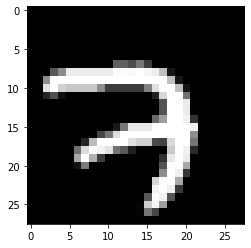

In [10]:
plt.imshow(images[0].reshape(28,28), cmap='gray')

In [12]:
digits.train.labels[0]

7

In [14]:
digits.test.images.shape

(10000, 784)

In [15]:
digits = read_data_sets('../data/.', one_hot=True)
# 独热编码

Extracting ../data/.\train-images-idx3-ubyte.gz
Extracting ../data/.\train-labels-idx1-ubyte.gz
Extracting ../data/.\t10k-images-idx3-ubyte.gz
Extracting ../data/.\t10k-labels-idx1-ubyte.gz


In [16]:
digits.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [19]:
digits.train.next_batch(100)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.,

In [27]:
# 定义预测函数

# 把样本X和y定义为占位
X = tf.placeholder(dtype=tf.float64, shape=(None, 784))
Y = tf.placeholder(dtype=tf.float64, shape=(None, 10))

# 把W和B定义为变量
W = tf.Variable(initial_value=np.random.rand(784,10), dtype=tf.float64)
B = tf.Variable(initial_value=0, dtype=tf.float64)
# 定义线性方程
Y_pred = tf.add(tf.matmul(X,W), B)

Y_prob = tf.nn.softmax(Y_pred) # shape (None, 10)


# 定义损失函数
# 交叉熵
cost = tf.reduce_mean(tf.reduce_sum(tf.multiply(Y, tf.log(1 / Y_prob)), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)

init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    for j in range(120):
        for i in range(550):
            X_train, y_train =  digits.train.next_batch(100)
            sess.run(optimizer, feed_dict={X:X_train, Y:y_train})
        X_test, y_test = digits.test.next_batch(5000)
        loss = sess.run(cost, feed_dict={X: X_test, Y:y_test})
        print(f'第{j}训练, 损失{loss}')
        
    # 跑完 之后用生成的模型计算准确率
    X_test, y_test = digits.test.next_batch(10000)
    y_ = sess.run(Y_prob, feed_dict={X: X_test})
    
    # 返回最大的数的索引
    y_test_max = tf.argmax(y_test, axis=1)
    y_max = tf.argmax(y_, axis=1)
    result = tf.equal(y_test_max, y_max) # [True, False, True, ...]
    # 手动把布尔值的数组转化为数字
    final = tf.cast(result, dtype=tf.float64)
    accuracy = tf.reduce_sum(final) / 10000
    acc = sess.run(accuracy)
    print('最终准确率:', acc)

第0训练, 损失1.647411417729874
第1训练, 损失1.1237326871391113
第2训练, 损失0.9044856621062006
第3训练, 损失0.8036779828812888
第4训练, 损失0.6942362888666938
第5训练, 损失0.6499940404731168
第6训练, 损失0.6235928487738296
第7训练, 损失0.576952082200779
第8训练, 损失0.5699626102929711
第9训练, 损失0.5312985832589062
第10训练, 损失0.5333376697381569
第11训练, 损失0.5101504066907726
第12训练, 损失0.49461449795565604
第13训练, 损失0.4817127142327923
第14训练, 损失0.4780460269887748
第15训练, 损失0.46769714808220814
第16训练, 损失0.45633205646190983
第17训练, 损失0.4503238464385968
第18训练, 损失0.4445793146819286
第19训练, 损失0.44691656852825856
第20训练, 损失0.42415675121390634
第21训练, 损失0.4200335908919098
第22训练, 损失0.4307798177138924
第23训练, 损失0.42880831941453723
第24训练, 损失0.404006815522864
第25训练, 损失0.39271331271414517
第26训练, 损失0.4250412257740896
第27训练, 损失0.40535346940631456
第28训练, 损失0.3985607498308622
第29训练, 损失0.40389976579146986
第30训练, 损失0.38821817021607835
第31训练, 损失0.3981980621023958
第32训练, 损失0.3829970052286555
第33训练, 损失0.3952075299484913
第34训练, 损失0.37621667086725713
第35训练, 损失0.39224812435